![](pictures/openvino_start.png)

# Section 0: Registration (Set Up Environment)

The first step of this workshop is initializing OpenVINO environment in this jupyter notebook. 
The OpenVINO 2020.1 package have been installed to `intel/openvino/` already.
For initializing the OpenVINO environment you should run the script `intel/openvino/bin/setupvars.sh`
If the prerequisite steps have been done right, you will see the output: 

```
[setupvars.sh] OpenVINO environment initialized
OpenVINO Inference Engine version is: 2.1.37988
```

In [1]:
!bash ~/intel/openvino/bin/setupvars.sh

from openvino import inference_engine as ie
print('OpenVINO Inference Engine version is: {}'.format(ie.__version__))

[setupvars.sh] OpenVINO environment initialized
OpenVINO Inference Engine version is: 2.1.37988


# Agenda

##  1. Introduction

##  2. What is SSD MobileNet V2?

# Section 1: Introduction

![](pictures/training_vs_inference.png)

![](pictures/about_vino.png)

In [2]:
# mostly for working with paths: os.path
import os

# working with arrays
import numpy as np 

# path with data for the workshop
WORKSHOP_DATA_PATH = os.path.join('.', 'data')

## Inference in 4 line

### After the installation [OpenVINO](https://docs.openvinotoolkit.org/) you can do inference

In [3]:
from openvino import inference_engine as ie

# Create an instance of OpenVINO Inference Engine Core 
# Thi is key module of OpenVINO Inference Engine
ie_core = ie.IECore()

# Read a network from Intermediate Representation (IR)
network = ie.IENetwork(os.path.join(WORKSHOP_DATA_PATH, 'model.xml'), 
                       os.path.join(WORKSHOP_DATA_PATH, 'model.bin'))

# Loads the network that was read from the Intermediate Representation (IR) 
# to the CPU device 
network_loaded_on_device = ie_core.load_network(network=network, device_name='CPU')

# Start inference of the loaded network and returns output data.
network_loaded_on_device.infer(inputs={'data': np.random.rand(1, 3, 227, 227)})

{'prob': array([[[[4.85934725e-05]],
 
         [[2.36724503e-04]],
 
         [[2.63492088e-03]],
 
         [[1.66318729e-03]],
 
         [[5.63141285e-03]],
 
         [[7.85113126e-03]],
 
         [[6.97951578e-03]],
 
         [[2.09565642e-05]],
 
         [[2.10617727e-05]],
 
         [[1.41952856e-04]],
 
         [[5.66127055e-05]],
 
         [[6.48878195e-05]],
 
         [[3.57135468e-05]],
 
         [[1.36464863e-04]],
 
         [[1.41895260e-04]],
 
         [[2.77478503e-05]],
 
         [[2.26375250e-05]],
 
         [[4.44097896e-05]],
 
         [[1.84621356e-04]],
 
         [[6.73960021e-05]],
 
         [[1.85992292e-04]],
 
         [[1.86574631e-04]],
 
         [[1.18714685e-04]],
 
         [[1.47094834e-04]],
 
         [[1.93941814e-04]],
 
         [[2.20471658e-04]],
 
         [[1.76261630e-04]],
 
         [[2.05909848e-04]],
 
         [[5.12821949e-04]],
 
         [[2.49698496e-04]],
 
         [[1.61429398e-05]],
 
         [[8.71036958e-04]],
 


### For more information about go to references of [OpenVINO Inference Engine Python API](https://docs.openvinotoolkit.org/latest/ie_python_api/annotated.html)

# Section 2: What is SSD MobileNet V2?
![](pictures/mobileNet-SSD-network-architecture.png)

1. Classifier, name - `detection_classes`, contains predicted bounding boxes classes in range [1, 91]. The model was trained on Microsoft\* COCO dataset version with 90 categories of object.
2. Probability, name - `detection_scores`, contains probability of detected bounding boxes.
3. Detection box, name - `detection_boxes`, contains detection boxes coordinates in format `[y_min, x_min, y_max, x_max]`, where (`x_min`, `y_min`)  are coordinates top left corner, (`x_max`, `y_max`) are coordinates right bottom corner. Coordinates are rescaled to input image size.
4. Detections number, name - `num_detections`, contains the number of predicted detection boxes.


# Section 3: Where can I found the model?

The OpenVINO package contains tools for easy downloading model from [OpenVINO OpenModelZoo](https://github.com/opencv/open_model_zoo) 


To see all available models (both public open-sourse from different frameworks (TensorFlow, Caffe, MxNet, Pytorch e.t.c) and made in Intel) you can run `downloader.py` script with parameter `--print_all`

In [4]:
!python3 ${INTEL_OPENVINO_DIR}/deployment_tools/open_model_zoo/tools/downloader/downloader.py --print_all

action-recognition-0001-decoder
action-recognition-0001-encoder
age-gender-recognition-retail-0013
asl-recognition-0003
driver-action-recognition-adas-0002-decoder
driver-action-recognition-adas-0002-encoder
emotions-recognition-retail-0003
face-detection-adas-0001
face-detection-adas-binary-0001
face-detection-retail-0004
face-detection-retail-0005
face-reidentification-retail-0095
facial-landmarks-35-adas-0002
gaze-estimation-adas-0002
handwritten-score-recognition-0003
head-pose-estimation-adas-0001
human-pose-estimation-0001
image-retrieval-0001
instance-segmentation-security-0010
instance-segmentation-security-0050
instance-segmentation-security-0083
landmarks-regression-retail-0009
license-plate-recognition-barrier-0001
pedestrian-and-vehicle-detector-adas-0001
pedestrian-detection-adas-0002
pedestrian-detection-adas-binary-0001
person-attributes-recognition-crossroad-0230
person-detection-action-recognition-0005
person-detection-action-recognition-0006
person-detection-action-re

Let's try to download an object detection model `ssd_mobilenet_v2_coco` using [Model Downloader](https://github.com/opencv/open_model_zoo/tree/master/tools/downloader)

In [5]:
!python3 ${INTEL_OPENVINO_DIR}/deployment_tools/open_model_zoo/tools/downloader/downloader.py \
--name ssd_mobilenet_v2_coco \
--output_dir ./data

################|| Downloading models ||################

========== Downloading data/public/ssd_mobilenet_v2_coco/ssd_mobilenet_v2_coco.tar.gz
... 100%, 183521 KB, 2609 KB/s, 70 seconds passed

################|| Post-processing ||################

========== Unpacking data/public/ssd_mobilenet_v2_coco/ssd_mobilenet_v2_coco.tar.gz


As we can see, Model Downloader can load not only publicly famous

![](pictures/models.png)

Model Downloader downloaded the model to `data/public/ssd_mobilenet_v2_coco/ssd_mobilenet_v2_coco_2018_03_29`

In [6]:
!ls data/public/ssd_mobilenet_v2_coco/ssd_mobilenet_v2_coco_2018_03_29

checkpoint			model.ckpt.index  saved_model
frozen_inference_graph.pb	model.ckpt.meta
model.ckpt.data-00000-of-00001	pipeline.config


# Section 4: Inference SSD MobileNet V2 on Tensorflow 

In [7]:
import os
import tensorflow as tf
from tensorflow.gfile import GFile

# Path to the Tensorflow model
model = os.path.join('data', 'public', 'ssd_mobilenet_v2_coco',
                     'ssd_mobilenet_v2_coco_2018_03_29', 'frozen_inference_graph.pb')
# SSD mobilenet v2 contains following output nodes
output_names = ['detection_classes:0','detection_scores:0', 'detection_boxes:0', 'num_detections:0']

# Create graph
graph = tf.Graph()
# Create graph definitions
graph_def = tf.GraphDef()

# Read model to the graph definitions
with open(model, "rb") as model_file:
    graph_def.ParseFromString(model_file.read())


with graph.as_default():
    # Import the graph definitions to TensorFlow
    tf.import_graph_def(graph_def, name='')
    # Get tensors for output nodes
    output_tensors = [graph.get_tensor_by_name(layer_name) for layer_name in output_names] 

    with tf.Session(graph=graph) as session:
        # Inference the model for random datates
        print(session.run(output_tensors, feed_dict = {'image_tensor:0' : np.random.rand(1, 300, 300, 3)}))

[array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]], dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32), array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],

# Section 5: Inference in real data on TensorFlow

For run the TensorFlow `ssd_mobilenet_v2_coco` model we need some utilitary functions:

In [46]:
import logging as log
import os
import sys

log.basicConfig(format="[ %(levelname)s ] %(message)s", level=log.INFO, stream=sys.stdout)

# How many times we will run inference to get more valid performance
NUM_RUNS = 1 
# Number of images for one inference
BATCH = 1

# This dirrectory contains all data for the workshop
WORKSHOP_DATA_PATH = os.path.join('.', 'data')

# Path to an test image
IMAGE = os.path.join(WORKSHOP_DATA_PATH, 'images', 'input', 'cats.jpg')

# Path to the downloaded tensorflow image
SSD_ASSETS = os.path.join(WORKSHOP_DATA_PATH, 'public', 'ssd_mobilenet_v2_coco')

# Path to the downloaded frozen tensorflow image
TF_MODEL = os.path.join(SSD_ASSETS, 'ssd_mobilenet_v2_coco_2018_03_29', 'frozen_inference_graph.pb')

# Path to result tensorflow image
TF_RESULT_IMAGE = os.path.join(WORKSHOP_DATA_PATH, 'images', 'output', 'tensorflow_output.png')

# Path to Inference Engine FP32 model
IE_MODEL_FP32_XML = os.path.join(SSD_ASSETS, 'FP32', 'ssd_mobilenet_v2_coco.xml')
IE_MODEL_FP32_BIN = os.path.join(SSD_ASSETS, 'FP32', 'ssd_mobilenet_v2_coco.bin')

# Path to Inference Engine INT8 model optimized  Default algorithm
IE_MODEL_DEFAULT_INT8_XML = os.path.join(SSD_ASSETS, 'INT8', 'default', 'optimized', 'ssd_mobilenet_v2_coco.xml')
IE_MODEL_DEFAULT_INT8_BIN = os.path.join(SSD_ASSETS, 'INT8', 'default', 'optimized', 'ssd_mobilenet_v2_coco.bin')

# Path to Inference Engine INT8 model optimized  AccuracyAware algorithm
IE_MODEL_AA_INT8_XML = os.path.join(SSD_ASSETS, 'INT8', 'acuracy_aware', 'optimized', 'ssd_mobilenet_v2_coco.xml')
IE_MODEL_AA_INT8_BIN = os.path.join(SSD_ASSETS, 'INT8', 'acuracy_aware', 'optimized', 'ssd_mobilenet_v2_coco.bin')

# Path to result tensorflow image
IE_RESULT_IMAGE = os.path.join(WORKSHOP_DATA_PATH, 'images', 'output', 'inference_engine_output.png')

# Path to combo (TF vs IE) tensorflow image
COMBO_RESULT_IMAGE = os.path.join(WORKSHOP_DATA_PATH, 'images', 'output', 'combo_output.png')

PERFORMANCE = {}

In [47]:
# Import OpenCV for image processing
import cv2

def read_resize_image(path_to_image: str, width: int, height: int):
    """
    Takes an image and resizes it to the given dimensions
    """
    #Load the image 
    raw_image = cv2.imread(path_to_image)
    #Return the resized to (width, height) size image  
    return cv2.resize(raw_image, (width, height), interpolation=cv2.INTER_NEAREST)

In [48]:
# Import needed functions from TensorFlow
import tensorflow as tf

import time

def tf_inference(graph: tf.Graph, input_data, input_name: str, outputs_names: list) -> tuple:
    """
    Return TensorFlow model inference results
    """
    
    log.info("Running inference with tensorflow ...")
  
    # Get input tensor by name
    input_tensor =  graph.get_tensor_by_name('{}:0'.format(input_name))
    
    # Fill input data
    feed_dict = {
        input_tensor: [input_data, ] 
    }

    # Collect output tensors
    output_tensors = []
    
    for output_name in outputs_names:
        tensor = graph.get_tensor_by_name('{}:0'.format(output_name))
        output_tensors.append(tensor)
    
    # Run inference and get performance
    log.info("Running tf.Session")
    with graph.as_default():
        with tf.Session(graph=graph) as session:
            inference_start = time.time()
            outputs = session.run(output_tensors, feed_dict=feed_dict)
            inference_end = time.time()
    
    # Collect inference results
    res = dict(zip(outputs_names, outputs))
    
    log.info("TensorFlow reference collected successfully")
    
    return res, inference_end - inference_start

In [54]:
import tensorflow as tf
import numpy as np

def tf_main(path_to_pb_model: str, 
            path_to_original_image: str, 
            number_inference: int = 1):
    """
    Entrypoint for inferencing with TensorFlow.
    the function
    """
    log.info('COMMON: image preprocessing')
    
    # Size of the image is 300x300 pixels and 3 chanels (RGB)
    width = 300
    
    image_shape = (300, 300, 3)
    
    resized_image = read_resize_image(path_to_original_image, width, width)
    
    reshaped_image = np.reshape(resized_image, image_shape)
    
    log.info('Current shape: {}'.format(reshaped_image.shape))

    log.info('TENSORFLOW SPECIFIC: Loading a model with TensorFLow')
    
    tf.reset_default_graph()
    graph = tf.Graph()
    graph_def = tf.GraphDef()

    with open(path_to_pb_model, "rb") as model_file:
        graph_def.ParseFromString(model_file.read())

    with graph.as_default():
        tf.import_graph_def(graph_def, name='')

    log.info("tf graph was created")
    
    # We use SSD MobileNet V2 and we know name of the input 
    input_layer = 'image_tensor'
    
    # And we know names of outputs
    output_layers = ['num_detections', 'detection_classes', 'detection_scores', 'detection_boxes']
    
    collected_inference_time = []
    
    for run in range(number_inference):
        raw_results, inference_time = tf_inference(graph, reshaped_image, input_layer, output_layers)
        collected_inference_time.append(inference_time)
    
    tensorflow_average_inference_time = sum(collected_inference_time) / number_inference
    
    log.info('TENSORFLOW SPECIFIC: Plain inference finished')

    return raw_results, tensorflow_average_inference_time

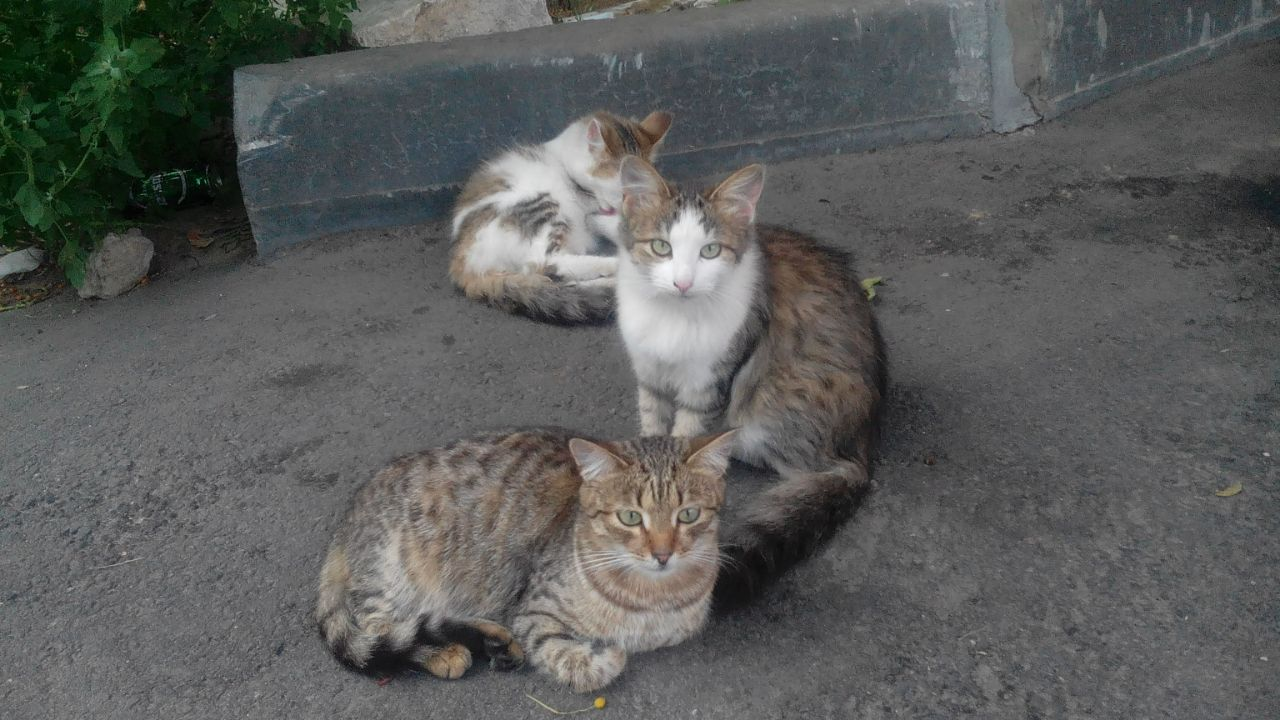

In [55]:
# Import classe Image from display for show an image
from IPython.display import Image
# Show the image in the notebok
Image(filename=IMAGE)

## All ready for inference the model in the real image

In [56]:
framework = 'TF'
device = 'CPU'
name = '{f} on {d}'.format(f=framework, d=device)

tensorflow_fps_collected = []

# Run inference on TensorFlow
tensorflow_predictions, tensorflow_average_inference_time = tf_main(TF_MODEL, IMAGE, number_inference=NUM_RUNS)
    
log.info('Inference Time of SSD MobileNet V2 {} is {} seconds'.format(name, tensorflow_average_inference_time))

# Calculate FPS from inference time
tensorflow_average_fps = 1 / tensorflow_average_inference_time

log.info('{} FPS: {}'.format(name, tensorflow_average_fps))

[ INFO ] COMMON: image preprocessing
[ INFO ] Current shape: (300, 300, 3)
[ INFO ] TENSORFLOW SPECIFIC: Loading a model with TensorFLow
[ INFO ] tf graph was created
[ INFO ] Running inference with tensorflow ...
[ INFO ] Running tf.Session
[ INFO ] TensorFlow reference collected successfully
[ INFO ] TENSORFLOW SPECIFIC: Plain inference finished
[ INFO ] Inference Time of SSD MobileNet V2 TF on CPU is 1.7605314254760742 seconds
[ INFO ] TF on CPU FPS: 0.5680103095743292


In [57]:
print(tensorflow_predictions['num_detections']) # get number of detected objects
print(tensorflow_predictions['detection_classes'][0])# get predicted classes ids
print(tensorflow_predictions['detection_scores'][0]) # get probabilities for predicted classes
print(tensorflow_predictions['detection_boxes'][0]) # get boxes for predicted objects

[2.]
[17. 17.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[0.9847796 0.8983046 0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0

In [58]:
from utils import parse_od_output, draw_image

processd_tensorflow_predictions = parse_od_output(tensorflow_predictions)
draw_image(IMAGE, processd_tensorflow_predictions, TF_RESULT_IMAGE)

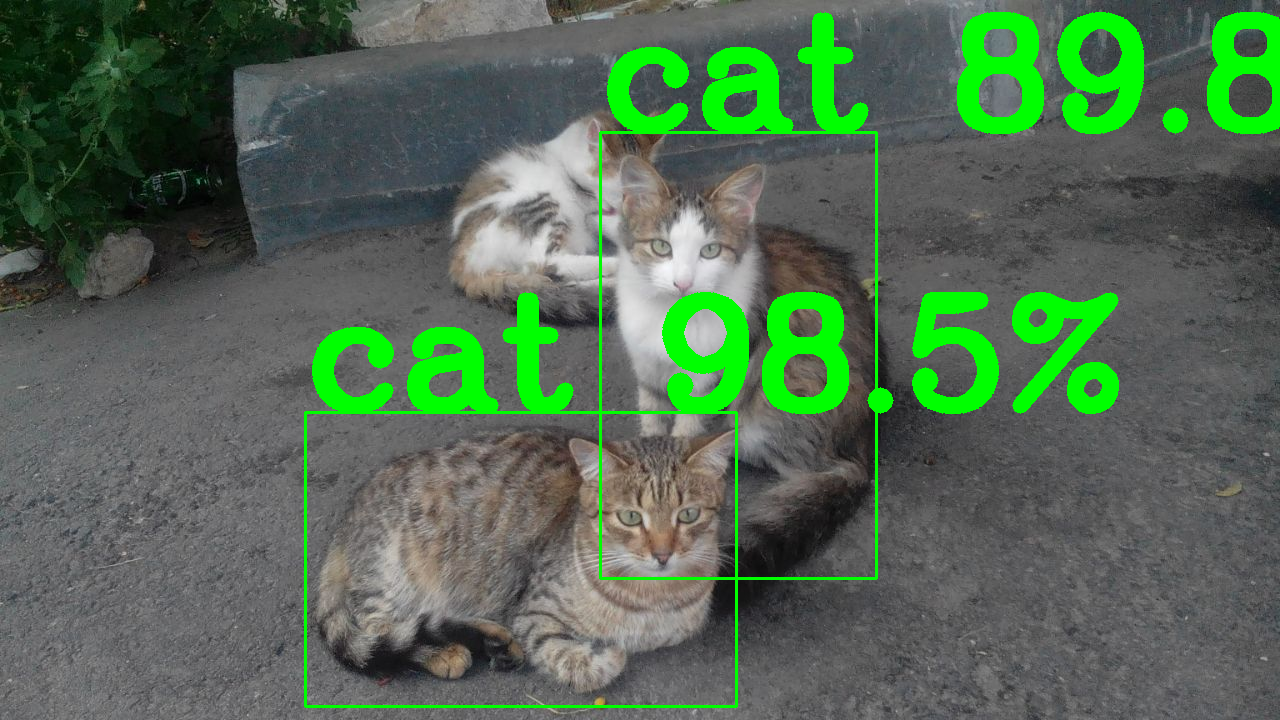

In [59]:
# Import classe Image from display for show an image
from IPython.display import Image

# Show the image in the notebok
Image(filename=TF_RESULT_IMAGE)

# Section 6: OpenVINO overview

![](pictures/openvino_toolkit.png)

![](pictures/additional_tools.png)

# Section 7: Entry to OpenVINO - Model Optimizer

![](pictures/model_optimizer.png)

 Let's convert the TensorFlow model to the IR format 

In [64]:
!python3 ${INTEL_OPENVINO_DIR}/deployment_tools/model_optimizer/mo.py \
--output_dir=data/public/ssd_mobilenet_v2_coco/FP32 \
--reverse_input_channels \
--model_name=ssd_mobilenet_v2_coco \
--transformations_config=${INTEL_OPENVINO_DIR}/deployment_tools/model_optimizer/extensions/front/tf/ssd_v2_support.json \
--tensorflow_object_detection_api_pipeline_config=data/public/ssd_mobilenet_v2_coco/ssd_mobilenet_v2_coco_2018_03_29/pipeline.config \
--output=detection_classes,detection_scores,detection_boxes,num_detections \
--input_model=data/public/ssd_mobilenet_v2_coco/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/home/atugarev/Developer/openvino_workshop/data/public/ssd_mobilenet_v2_coco/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
	- Path for generated IR: 	/home/atugarev/Developer/openvino_workshop/data/public/ssd_mobilenet_v2_coco/FP32
	- IR output name: 	ssd_mobilenet_v2_coco
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	detection_classes,detection_scores,detection_boxes,num_detections
	- Input shapes: 	Not specified, inherited from the model
	- Mean values: 	Not specified
	- Scale values: 	Not specified
	- Scale factor: 	Not specified
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	True
TensorFlow specific parameters:
	- Input model in text protobuf format: 	False
	- Path to mo

![](./pictures/openvino_support.png)

We can see the Intermediate Representation of the SSD MobileNet V2

In [18]:
!cat data/public/ssd_mobilenet_v2_coco/FP32/ssd_mobilenet_v2_coco.xml

<?xml version="1.0" ?>
<net name="ssd_mobilenet_v2_coco" version="10">
	<layers>
		<layer id="0" name="Preprocessor/sub/negate_/Output_0/Data_/copy_const" type="Const" version="opset1">
			<data element_type="f32" offset="0" shape="1,1,1,1" size="4"/>
			<output>
				<port id="1" precision="FP32">
					<dim>1</dim>
					<dim>1</dim>
					<dim>1</dim>
					<dim>1</dim>
				</port>
			</output>
		</layer>
		<layer id="1" name="Preprocessor/mul/x/Output_0/Data_/copy_const" type="Const" version="opset1">
			<data element_type="f32" offset="4" shape="1,1,1,1" size="4"/>
			<output>
				<port id="1" precision="FP32">
					<dim>1</dim>
					<dim>1</dim>
					<dim>1</dim>
					<dim>1</dim>
				</port>
			</output>
		</layer>
		<layer id="2" name="image_tensor" type="Parameter" version="opset1">
			<data element_type="f32" shape="1,3,300,300"/>
			<output>
				<port id="0" precision="FP32">
					<dim>1</dim>
					<dim>3</dim>
					<dim>300</dim>
					<dim>300</dim>
				</port>
			</output>
		</

# Section 8: Inference of SSD MobileNet V2 on OpenVINO Inference Engine 

In [65]:
from openvino.inference_engine import IECore, IENetwork
import numpy as np
import time

def ie_inference(path_to_model_xml: str, path_to_model_bin: str, path_to_original_image: str, device='CPU', batch=1):
    """
    Entrypoint for inferencing with OpenVINO Inference Engine
    """

    # Now let's create IECore() entity 
    log.info("Creating Inference Engine Core")   
    ie = IECore()

    # First create Network (Note you need to provide model in IR previously converted with Model Optimizer)
    log.info("Reading IR...")
    net = IENetwork(model=path_to_model_xml, weights=path_to_model_bin)

    # Get input and output blob of the network
    input_blob = next(iter(net.inputs))
    out_blob = next(iter(net.outputs))

    # Reshape the network to the needed batch
    n, c, h, w = net.inputs[input_blob].shape
    net.reshape({input_blob: (batch, c, h, w)})
    n, c, h, w = net.inputs[input_blob].shape
    
    # Resize the image 
    log.info('COMMON: image preprocessing')
    image = read_resize_image(path_to_original_image, h, w)
    
    # Now we load Network to plugin
    log.info("Loading IR to the plugin...")
    exec_net = ie.load_network(network=net, device_name=device, num_requests=2)

    del net

    labels_map = None
    
    # Read and pre-process input image
    image = image[..., ::-1]
    in_frame = image.transpose((2, 0, 1))  # Change data layout from HWC to CHW
    batched_frame = np.array([in_frame for _ in range(batch)])
    log.info('Current shape: {}'.format(batched_frame.shape))

    # Now we run inference on target device
    inference_start = time.time()
    res = exec_net.infer(inputs={input_blob: batched_frame})
    inference_end = time.time()

    log.info('INFERENCE ENGINE SPECIFIC: no post processing')

    return res[out_blob], inference_end - inference_start

In [68]:
def ie_main(xml:str, bin:str, device:str, postfix: str = ''):
    name = '{f} {p} on {d}'.format(f='IE', p=postfix, d=device)

    inference_engine_fps_collected = []

    for i in range(NUM_RUNS):
        # Run inference on OpenVINO Inference Engine
        predictions, inference_time = ie_inference(xml, bin,
                                                   IMAGE,
                                                   device,
                                                   batch=BATCH)
        
        log.info('Inference Time of SSD MobileNet V2 {} is {}'.format(name, inference_time))
        # Calculate FPS from inference time
        inference_engine_fps = 1 / inference_time
        
        inference_engine_fps_collected.append(inference_engine_fps)

    # Calculate the average FPS for all inferences
    inference_engine_avg_fps = (sum(inference_engine_fps_collected) * BATCH) / (NUM_RUNS)
    
    PERFORMANCE[name] = inference_engine_avg_fps

    log.info('{} FPS: {}'.format(name, inference_engine_avg_fps))
    
    return inference_engine_avg_fps, predictions

In [81]:
device = 'CPU'

# Tun inference 
inference_engine_average_fps, inference_engine_predictions = ie_main(IE_MODEL_FP32_XML, 
                                                                     IE_MODEL_FP32_BIN, 
                                                                     device)

[ INFO ] Creating Inference Engine Core
[ INFO ] Reading IR...
[ INFO ] COMMON: image preprocessing
[ INFO ] Loading IR to the plugin...
[ INFO ] Current shape: (1, 3, 300, 300)
[ INFO ] INFERENCE ENGINE SPECIFIC: no post processing
[ INFO ] Inference Time of SSD MobileNet V2 IE  on CPU is 0.00914311408996582
[ INFO ] IE  on CPU FPS: 109.37192625622572


In [82]:
inference_engine_predictions[0] # get data for the image

array([[[ 0.        , 17.        ,  0.9847797 ,  0.23862399,
          0.572328  ,  0.57552564,  0.9817138 ],
        [ 0.        , 17.        ,  0.89830726,  0.46918347,
          0.18471968,  0.6850692 ,  0.8038564 ],
        [-1.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 

In [87]:
from utils import parse_od_output, draw_image

draw_image(IMAGE, inference_engine_predictions, IE_RESULT_IMAGE, color=(255, 0, 0))

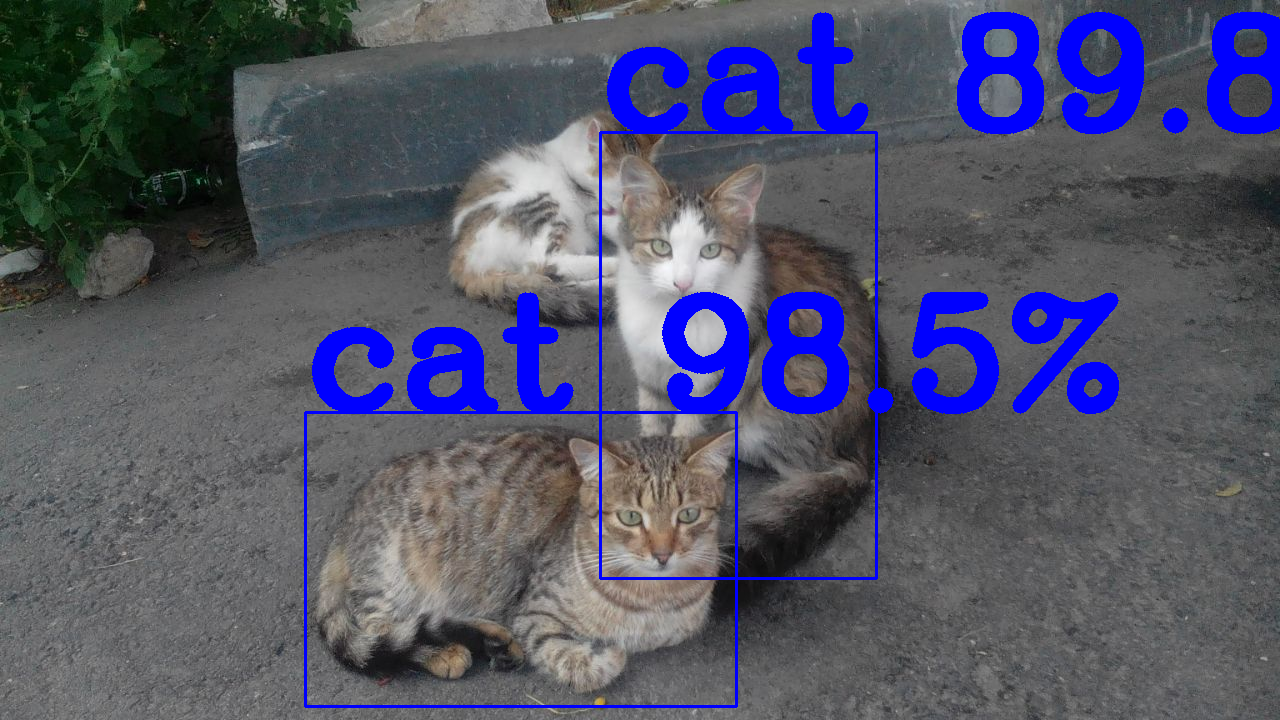

In [88]:
# Import classe Image from display for show an image
from IPython.display import Image

# Show the image in the notebok
Image(filename=IE_RESULT_IMAGE)

In [85]:
# Import some functions from matplotlib for show barcharts
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def show_results_interactively(tf_image: str, ie_image: str, combination_image: str, ie_fps:float, tf_fps:float):
    """
    Takes paths to three images and shows them with matplotlib on one screen
    """
    _ = plt.figure(figsize=(30, 10))
    gs1 = gridspec.GridSpec(1, 3)
    gs1.update(wspace=0.25, hspace=0.05)

    titles = [
        '(a) Tensorflow',
        '(b) Inference Engine',
        '(c) TensorFlow and Inference Engine\n predictions are identical'
    ]

    for i, path in enumerate([tf_image, ie_image, combination_image]):
        img_resized = cv2.imread(path)
        ax_plot = plt.subplot(gs1[i])
        ax_plot.axis("off")
        addon = ' '
        if i == 1:
            addon += '{:4.3f}'.format(ie_fps) + '(FPS)'
        elif i == 0:
            addon += '{:4.3f}'.format(tf_fps) + '(FPS)'

        ax_plot.text(0.5, -0.5, titles[i] + addon,
                     size=28, ha="center",
                     transform=ax_plot.transAxes)
        ax_plot.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

    plt.show()

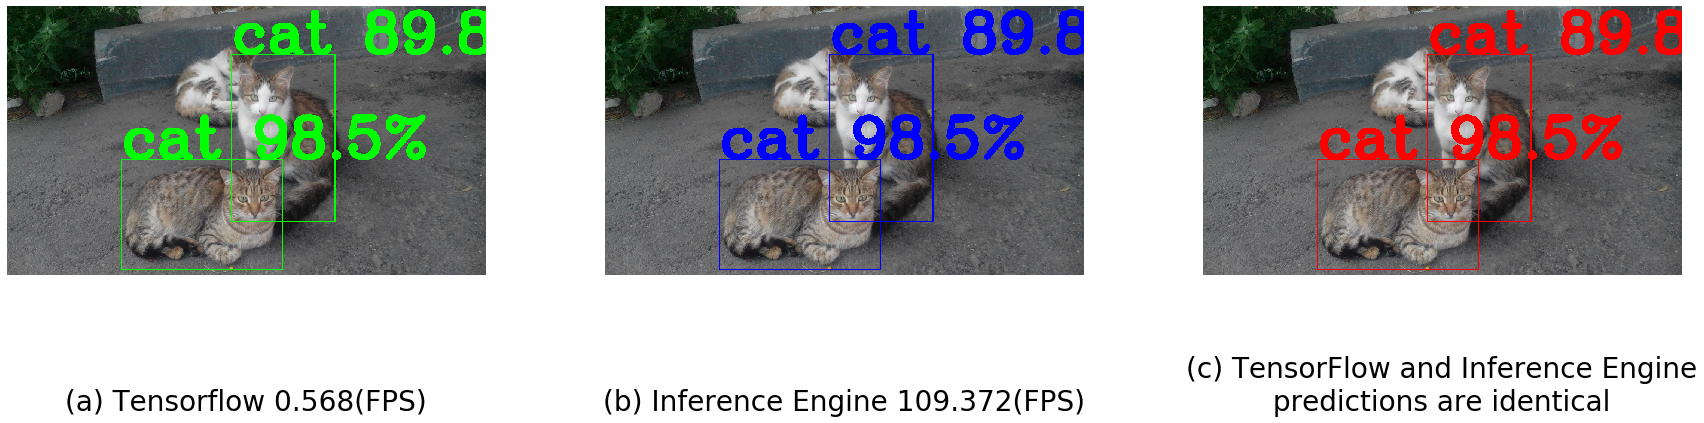

In [91]:
from utils import draw_image

# Draw Inference results from Inference Engine in the image with TF inference results
draw_image(TF_RESULT_IMAGE, inference_engine_predictions, COMBO_RESULT_IMAGE, color=(0, 0, 255))

show_results_interactively(tf_image=TF_RESULT_IMAGE,
                           ie_image=IE_RESULT_IMAGE,
                           combination_image=COMBO_RESULT_IMAGE,
                           ie_fps=inference_engine_average_fps,
                           tf_fps=tensorflow_average_fps)

In [92]:
from utils import show_performance

performance_data = {
    'TF on CPU': tensorflow_average_fps,
    'IE on CPU': inference_engine_average_fps
}

show_performance(performance_data)

NameError: name 'plt' is not defined

### Oh, this is good. The same results in one image. But it is onlu ONE image. We need check accuracy on full dataset. And how can we do this?

# [Accuracy Checker](https://github.com/opencv/open_model_zoo/tree/master/tools/accuracy_checker) - OpenVINO accuracy validation framework

![](pictures/accuracy_check.png)

In [ ]:
# replace variables to real path in the accuracy checker config:
!WORKSHOP_PATH=$(pwd) envsubst '\${WORKSHOP_PATH}' <data/configs/accuracy_checker_config_tf_template.yml >data/configs/accuracy_checker_config_tf.yml

# run acuracy checker:
!accuracy_check -c data/configs/accuracy_checker_config_tf.yml

# Coffee Break

In [ ]:
# replace variables to real path in the accuracy checker config:
!WORKSHOP_PATH=$(pwd) envsubst '\${WORKSHOP_PATH}' <data/configs/accuracy_checker_config_template.yml >data/configs/accuracy_checker_config.yml

# run accuracy checker
!accuracy_check -c data/configs/accuracy_checker_config.yml

In [ ]:
!cat data/configs/accuracy_checker_config.yml

# [Quantization the model to low precision](https://docs.openvinotoolkit.org/latest/_compression_algorithms_quantization_README.html)

![](pictures/quantization.png)

# [Post-Trainig Optimization Toolkit](https://docs.openvinotoolkit.org/latest/_README.html)

![](pictures/pot.png)

In [ ]:
!python3 ${INTEL_OPENVINO_DIR}/deployment_tools/tools/post_training_optimization_toolkit/main.py \
-c data/configs/default/quantization_config.json \
--output-dir data/public/ssd_mobilenet_v2_coco/INT8/default \
--direct-dump

/home/atugarev/intel/openvino_2020.1.023/deployment_tools/tools/post_training_optimization_toolkit/compression/algorithms/quantization/optimization/algorithm.py:39: UserWarning: Nevergrad package could not be imported. Consider installing itusing pip. Note that nevergrad is compatible only with Python 3.6+
  warnings.warn('Nevergrad package could not be imported. Consider installing it'
Output log dir: data/public/ssd_mobilenet_v2_coco/INT8/default
Creating pipeline:
Algorithm: DefaultQuantization
Parameters:
	preset                     : performance
	stat_subset_size           : 200
	target_device              : CPU
INFO:compression.statistics.collector:Start computing statistics for algorithms : DefaultQuantization
INFO:compression.statistics.collector:Computing statistics finished
INFO:compression.pipeline.pipeline:Start algorithm: DefaultQuantization
INFO:compression.statistics.collector:Start computing statistics for algorithms : ActivationChannelAlignment
INFO:compression.statist

In [ ]:
! cat data/configs/default/quantization_config.json

DefaultQuantization algorithm is designed to perform a fast but at the same time accurate 8-bits quantization of NNs. It consists of three algorithms that are sequentially applied to a model:
*  ActivationChannelAlignment - Used as a preliminary step before quantization and allows you to align ranges of output activations of Convolutional layers in order to reduce the quantization error.
*  MinMaxQuantization - This is a vanilla quantization method that automatically inserts `FakeQuantize` operations into the model graph based on the specified  target hardware and initializes them
using statistics collected on the calibration dataset.
*  BiasCorrection - Adjusts biases of Convolutional and Fully-Connected layers based on the quantization error of the layer in order to make the overall error unbiased.

In [ ]:
device = 'CPU'
ie_avg_fps, predictions = ie_inference(IE_MODEL_DEFAULT_INT8_XML, IE_MODEL_DEFAULT_INT8_BIN, device, 'INT8 D')

draw_image(TF_RESULT_IMAGE, predictions, COMBO_RESULT_IMAGE, color=(0, 0, 255))

show_results_interactively(tf_image=TF_RESULT_IMAGE,
                           ie_image=IE_RESULT_IMAGE,
                           combination_image=COMBO_RESULT_IMAGE,
                           ie_fps=ie_avg_fps,
                           tf_fps=tf_avg_fps)

show_performance(PERFORMANCE)

In [ ]:
# replace variables to real path in the accuracy checker config:
!WORKSHOP_PATH=$(pwd) envsubst '\${WORKSHOP_PATH}' <data/configs/default/accuracy_checker_config_template.yml >data/configs/default/accuracy_checker_config.yml

# run accuracy checker
!accuracy_check -c data/configs/default/accuracy_checker_config.yml

# Accuracy Aware Algorithm

In [ ]:
!python3 ${INTEL_OPENVINO_DIR}/deployment_tools/tools/post_training_optimization_toolkit/main.py \
-c data/configs/accuracy_aware/quantization_config.json \
--output-dir data/public/ssd_mobilenet_v2_coco/INT8/acuracy_aware \
--direct-dump

In [ ]:
! cat data/configs/accuracy_aware/quantization_config.json

1. The model gets fully quantized using the DefaultQuantization algorithm.
2. The quantized and full-precision models are compared on a subset of the validation set in order to find mismatches in the target accuracy metric. A ranking subset is extracted based on the mismatches.
3. A layer-wise ranking is performed in order to get a contribution of each quantized layer into the accuracy drop.
4. Based on the ranking, the most "problematic" layer is reverted back to the original precision. This change is followed by the evaluation of the obtained model on the full validation set in order to get a new accuracy drop.
5. If the accuracy criteria are satisfied for all pre-defined accuracy metrics, the algorithm finishes. Otherwise, it continues reverting the next "problematic" layer.
6. It may happen that regular reverting does not get any accuracy improvement or even worsen the accuracy. Then the re-ranking is triggered as it is described in step 3.

In [ ]:
device = 'CPU'
ie_avg_fps, predictions = ie_inference(IE_MODEL_AA_INT8_XML, IE_MODEL_AA_INT8_BIN, device, 'INT8 AA')

draw_image(TF_RESULT_IMAGE, predictions, COMBO_RESULT_IMAGE, color=(0, 0, 255))

show_results_interactively(tf_image=TF_RESULT_IMAGE,
                           ie_image=IE_RESULT_IMAGE,
                           combination_image=COMBO_RESULT_IMAGE,
                           ie_fps=ie_avg_fps,
                           tf_fps=tf_avg_fps)

show_performance(PERFORMANCE)

In [ ]:
# replace variables to real path in the accuracy checker config:
!WORKSHOP_PATH=$(pwd) envsubst '\${WORKSHOP_PATH}' <data/configs/accuracy_aware/accuracy_checker_config_template.yml >data/configs/accuracy_aware/accuracy_checker_config.yml

# run accuracy checker
!accuracy_check -c data/configs/accuracy_aware/accuracy_checker_config.yml

# Deep Learning Boost

![](pictures/dl_boost.png)

# Good performance results! But all we know that if you want the best performance you need to use C++!

There is C++ benchmark application in Inference samples. Let's build it from sources and try!

In [ ]:
! mkdir ${INTEL_OPENVINO_DIR}/deployment_tools/inference_engine/samples/cpp/build 
! cd ${INTEL_OPENVINO_DIR}/deployment_tools/inference_engine/samples/cpp/build && cmake .. && make benchmark_app -j8

In [ ]:
!${INTEL_OPENVINO_DIR}/deployment_tools/inference_engine/samples/cpp/build/intel64/Release/benchmark_app -h

In [ ]:
!${INTEL_OPENVINO_DIR}/deployment_tools/inference_engine/samples/cpp/build/intel64/Release/benchmark_app -m data/public/ssd_mobilenet_v2_coco/FP32/ssd_mobilenet_v2_coco.xml

In [ ]:
PERFORMANCE['OpenVINO IE Benchmark INT8'] = 139.86
show_performance(PERFORMANCE)

# Practice

In [ ]:
import os

# Read/write video, work with images
import cv2

# Inference
from openvino.inference_engine import IENetwork, IECore

# Show videos in the notebook
from ipywidgets import Video

In [ ]:
MODEL_PATH_XML = IE_MODEL_FP32_XML
MODEL_PATH_BIN = IE_MODEL_FP32_BIN

DEVICE = 'CPU'

DATA_PATH = os.path.join('practice', 'data')
INPUT_VIDEO = os.path.join(DATA_PATH, 'artyom.MP4')
OUTPUT_VIDEO = os.path.join(DATA_PATH, 'out_artyom.MP4')

LABELS_PATH = os.path.join(DATA_PATH, 'coco_labels.txt')

In [ ]:
Video.from_file(INPUT_VIDEO)

In [ ]:
def prapare_out_video_stream(input_video_stream):
    width  = int(input_video_stream.get(3))
    height = int(input_video_stream.get(4))
    return cv2.VideoWriter(OUTPUT_VIDEO, cv2.VideoWriter_fourcc(*'X264'), 20, (width, height))

In [ ]:
# Create object of IECore. 
# This class represents an Inference Engine entity 
# and allows you to manipulate with plugins using unified interfaces
ie = IECore()

# Load network as Intermediate Representation 
# The IENetwork class contains the information about the network model read from Intermediate Representation
# and allows you to manipulate with some model parameters such as layers affinity and output layers
net = IENetwork(model=MODEL_PATH_XML, weights=MODEL_PATH_BIN)

# Get names of input layers of the network
input_blob = next(iter(net.inputs))

print('Input layer of the network is {}'.format(input_blob))

# Get shape (dimensions) of the input layer of the network
# n - number of batch
# c - number of an input image channels (usualy 3 - R, G and B) 
# h - height
# w - width
n, c, h, w = net.inputs[input_blob].shape

print('Input shape of the network is [{}, {}, {}, {}]'.format(n, c, h, w))

# Get names of output layers of the network
out_blob = next(iter(net.outputs))

print('Output layer of the network is {}'.format(out_blob))

# Load names of COCO classes from the file 
with open(LABELS_PATH, 'r') as f:
    labels_map = [x.strip() for x in f]

# Load the network to the device
# The load_network function returns an object of ExecutableNetwork
# This class represents a network instance loaded to plugin and ready for inference
exec_net = ie.load_network(network=net, num_requests=2, device_name=DEVICE)


# Open an input video
input_video_stream = cv2.VideoCapture(INPUT_VIDEO)

# Create an output video stream
out = prapare_out_video_stream(input_video_stream)



feed_dict = {}

cur_request_id = 0
next_request_id = 1

# Do loop ny input video
while input_video_stream.isOpened():
    
    # Read the next frame from the intput video 
    ret, frame = input_video_stream.read()
    # Check if video is over
    if not ret:
        # Exit from the loop if video is over
        break 
    # Get height and width of the frame
    frame_h, frame_w = frame.shape[:2]
    
    # Resize the frame to network's input 
    in_frame = cv2.resize(frame, (w, h))
    
    # Change data layout from HWC to CHW
    in_frame = in_frame.transpose((2, 0, 1))  
    
    # Reshape the frame to network's input 
    in_frame = in_frame.reshape((n, c, h, w))
    
    # Prepare data for network.
    # This must be a dictionary: 
    #   key - name of the input layer
    #   value - input data (the prepared frame)  
    feed_dict[input_blob] = in_frame
    
    # Start Asynchronous Inference.
    # We must set request_id - number or identificator of Inference Request
    # and input data - the dictionary
    exec_net.start_async(request_id=cur_request_id, inputs=feed_dict)
    
    # Wait the inference request until Inference Engine finished the inference of the request
    if exec_net.requests[cur_request_id].wait(-1) == 0:
        # Read result of the inference from the out layer of the execution network 
        inference_request_result = exec_net.requests[cur_request_id].outputs[out_blob]
        
        # Iterate by all found objects
        for obj in inference_request_result[0][0]:
            # Draw only objects when probability more than specified threshold
            if obj[2] > 0.5:
                # Get coordinates of the found object
                # and scale it to the original size of the frame
                xmin = int(obj[3] * frame_w)
                ymin = int(obj[4] * frame_h)
                xmax = int(obj[5] * frame_w)
                ymax = int(obj[6] * frame_h)
                
                # Get class ID of the found object
                class_id = int(obj[1])
                
                # Get confidence for the found object.
                confidence = round(obj[2] * 100, 1)
                
                # Draw box and label
                color = (min(class_id * 12.5, 255), min(class_id * 7, 255), min(class_id * 5, 255))
                cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), color, 2)
                
                # Get label of the class
                label = labels_map[class_id]
                
                # Create titel of the object
                text = '{}: {}% '.format(label, confidence)
                
                # Put the titel to the frame
                cv2.putText(frame, text, (xmin, ymin - 7), cv2.FONT_HERSHEY_COMPLEX, 2, color, 2)
        
    # Write the result frame to the out stream
    out.write(frame)

# Save result video
out.release()

In [ ]:
Video.from_file(OUTPUT_VIDEO)